Forecasted Tourist Arrivals:
2023-01-01    1088.900437
2023-02-01    1026.608856
2023-03-01    1008.227762
Freq: MS, Name: predicted_mean, dtype: float64


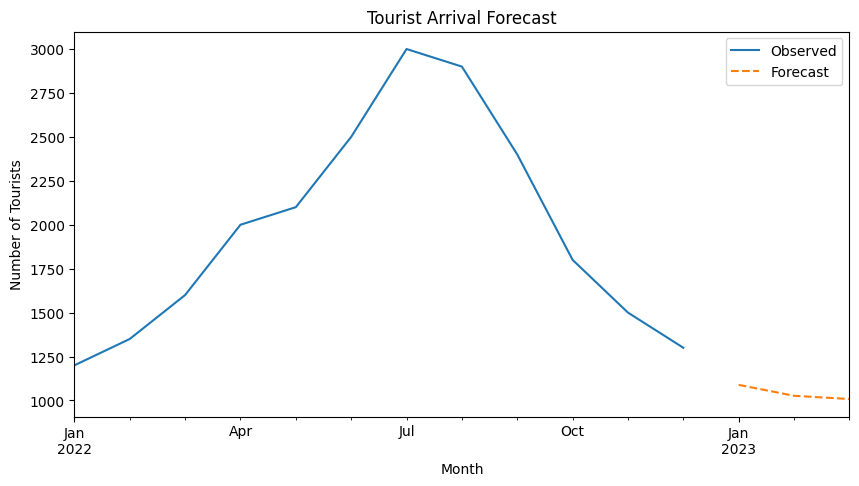

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load the data
data = {
    'Month': [
        '2022-01', 
        '2022-02', 
        '2022-03', 
        '2022-04', 
        '2022-05', 
        '2022-06',
        '2022-07', 
        '2022-08', 
        '2022-09', 
        '2022-10', 
        '2022-11', 
        '2022-12'
    ],
    'Tourists': [1200, 1350, 1600, 2000, 2100, 2500, 3000, 2900, 2400, 1800, 1500, 1300]
}
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.index = pd.DatetimeIndex(df.index, freq='MS')

# Step 2: Fit ARIMA model (order can be tuned based on AIC/BIC)
model = ARIMA(df['Tourists'], order=(1,1,1))
model_fit = model.fit()

# Step 3: Forecast next 3 months
forecast = model_fit.forecast(steps=3)
print("Forecasted Tourist Arrivals:")
print(forecast)

# Step 4: Plot
df['Tourists'].plot(label='Observed', figsize=(10, 5))
forecast.plot(label='Forecast', style='--')
plt.legend()
plt.title("Tourist Arrival Forecast")
plt.ylabel("Number of Tourists")
plt.show()
